In [70]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.5
    , 'legend.markerscale': 1.})
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)

In [72]:
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
lw1=3
aph=.7

## Load spectra calculated by Sarah Gille

column 1:  wavenumber (in cycles per km)

column 2:  descending track spectrum

column 3:  ascending track spectrum

column 4:  descending track lower error bar

column 5:  descending track upper error bar

column 6:  ascending track lower error bar

column 7:  ascending track upper error bar

In [73]:
spec = np.loadtxt('spec/spec_altika_dp.dat')

In [74]:
k = spec[:,0]

In [93]:
## -2 and -3 slopes in the loglog space
ks = np.array([1.e-3,1])
Es2 = .1e-3*(ks**(-3/2.))
Es4 = 1.e-9*(ks**(-4))
Es5 = 1.e-11*(ks**(-5))
rd1 = 22.64 # [km]
Enoise = np.ones(2)*2.*1.e-4

def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([500.,200.,100.,40.,20.,10.,5.])
    lp=np.array([500,200,100,40,20,10,5])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')
    
lw = 3.

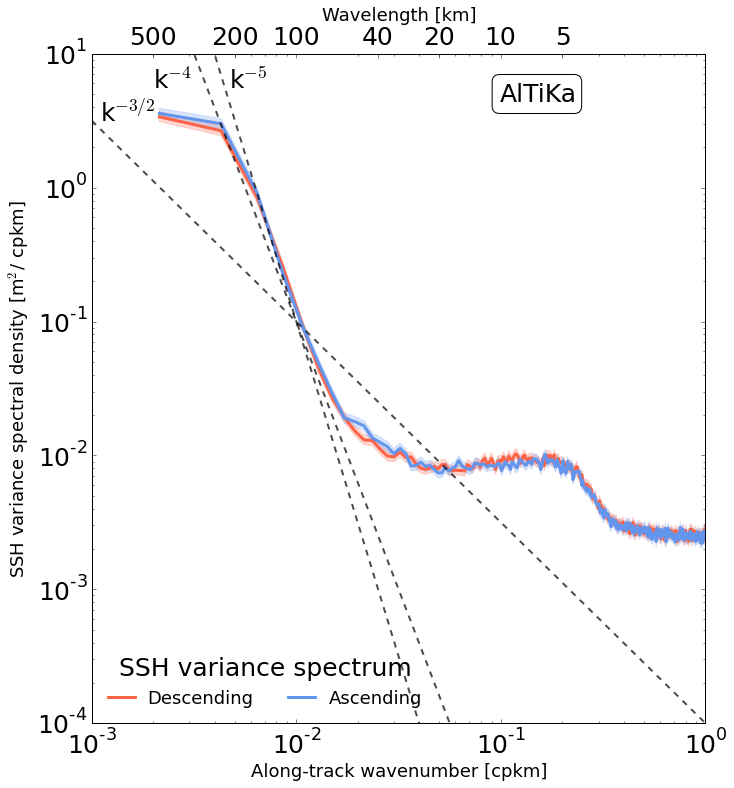

In [96]:
fig = plt.figure(figsize=(11.,12.))
ax1 = fig.add_subplot(111)

ax1.fill_between(k,spec[:,3],spec[:,4], color=color1, alpha=0.25)
ax1.fill_between(k,spec[:,5],spec[:,6], color=color2, alpha=0.25)


ax1.set_xscale('log'); ax1.set_yscale('log')

ax1.loglog(k,spec[:,1],color=color1,linewidth=lw,label="Descending")
ax1.loglog(k,spec[:,2],color=color2,linewidth=lw,label="Ascending")


ax1.axis((1./(1000),1./4,.4e-5,10))

ax1.loglog(ks,Es2,'--', color='k',linewidth=2.,alpha=.7)
ax1.loglog(ks,Es5,'--', color='k',linewidth=2.,alpha=.7)
ax1.loglog(ks,Es4,'--', color='k',linewidth=2.,alpha=.7)




plt.text(0.0011, 3.1,u'k$^{-3/2}$',fontsize=25)
plt.text(0.0047, 5.51,u'k$^{-5}$',fontsize=25)
plt.text(0.002, 5.51,u'k$^{-4}$',fontsize=25)


plt.xlabel('Along-track wavenumber [cpkm]')
plt.ylabel(u'SSH variance spectral density [m$^{2}$/ cpkm]')
    
lg = plt.legend(loc=3, numpoints=1,ncol=2)
lg.set_title(r"SSH variance spectrum",{'size':25})
lg.draw_frame(False)

plt.axis((1./1.e3,1.,1./1.e4,1.e1))

plt.text(0.15, 5., "AlTiKa", size=25, rotation=0.,
            ha="center", va="center",
            bbox = dict(boxstyle="round",ec='k',fc='w'))

add_second_axis(ax1)
    
plt.savefig('figs/spec_altika_asc_desc',bbox_inches='tight')